# LAT Workshop 教程 #1：灵敏度曲线、信噪比、内积、似然

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # 可能有用

在第一个教程中，我们将学习如何使用 `lisatools` 生成 LISA 的灵敏度曲线，并使用这些信息计算一组基本信号源的内积、信噪比和似然。

## 任务 1： 绘制并比较灵敏度曲线。

计算并绘制特征应变表示中的[LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)。将LDC2A（或 Sangria）数据集的模型与`scirdv1`进行比较。


In [2]:
# 声明用到的函数和操作
from lisatools.sensitivity import LISASens, get_sensitivity, get_stock_sensitivity_options
import lisatools.detector as lisa_models

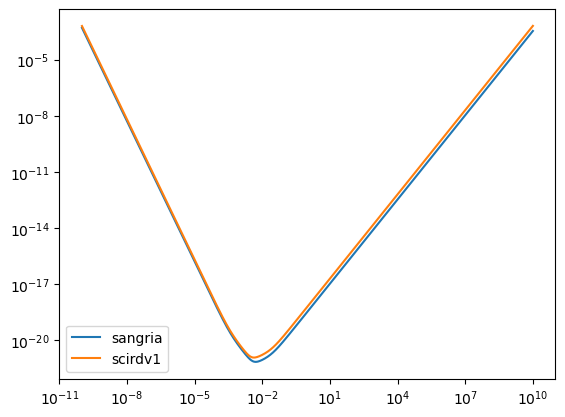

In [3]:
f = np.logspace(-10, 10, 1000) #生成对数间距向量
Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.sangria, return_type='char_strain')
#计算sangria模型的灵敏度
plt.loglog(f, Sn, label="sangria")#绘图

Sn = get_sensitivity(f, sens_fn=LISASens, average=True, model=lisa_models.scirdv1, return_type='char_strain')
#计算scirdv1模型的灵敏度
plt.loglog(f, Sn, label="scirdv1")#绘图
plt.legend()

这是sangria和scirdv1在(1e-10,1e10）上的一个灵敏度曲线。

### 问题 1

灵敏度曲线模型的差异会如何影响 LISA 的观测？考虑更多的较低或高频率的噪声会对不同的源的类产生什么影响。

### 回答
灵敏度曲线的差异代表了一个参数改变多少会对产生的结果造成多大的影响。灵敏度曲线一般越接近左上角，灵敏度越高，误判率越低，性能越好。按照这个判断方式，scirdv1的性能相较sangria更好。它反映了当噪音这个参数变动时，scirdv1结果的改变会比sangria更加明显。

### 问题 2

计算LISASens并说明它的含义。不查看文件，你能确定总体天空平均因子是多少吗？

In [4]:
Sn_averaged = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=True, return_type="char_strain")
Sn = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=False, return_type="char_strain")

print(Sn_averaged)
print(Sn)

[5.02291529e-04 4.47616208e-04 3.98892392e-04 3.55472250e-04
 3.16778468e-04 2.82296571e-04 2.51568091e-04 2.24184459e-04
 1.99781585e-04 1.78035006e-04 1.58655581e-04 1.41385640e-04
 1.25995563e-04 1.12280724e-04 1.00058768e-04 8.91671946e-05
 7.94611879e-05 7.08116971e-05 6.31037187e-05 5.62347674e-05
 5.01135135e-05 4.46585690e-05 3.97974048e-05 3.54653869e-05
 3.16049169e-05 2.81646658e-05 2.50988922e-05 2.23668334e-05
 1.99321640e-05 1.77625127e-05 1.58290318e-05 1.41060137e-05
 1.25705492e-05 1.12022227e-05 9.98284096e-06 8.89619107e-06
 7.92782495e-06 7.06486719e-06 6.29584391e-06 5.61053017e-06
 4.99981404e-06 4.45557544e-06 3.97057818e-06 3.53837373e-06
 3.15321549e-06 2.80998241e-06 2.50411086e-06 2.23153397e-06
 1.98862755e-06 1.77216192e-06 1.57925897e-06 1.40735384e-06
 1.25416088e-06 1.11764325e-06 9.95985810e-07 8.87570994e-07
 7.90957322e-07 7.04860220e-07 6.28134939e-07 5.59761340e-07
 4.98830329e-07 4.44531766e-07 3.96143697e-07 3.53022756e-07
 3.14595605e-07 2.803513

In [5]:
print(Sn_averaged / Sn) #计算结果是总体天空平均因子

[2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889 2.5819889
 2.581

### 回答
LISASens表示需要的PSD 函数的名称，类型是一个字符串或者类。<class 'lisatools.sensitivity.LISASens'>
get_sensitivity中的average参数可以确定是否将平均因子运用进灵敏度计算，因此可以得到averaged和disaveraged的灵敏度，发现它都各自输出了一个list，这两个list都包含了很多不同的数据，但它们相除后会得到一个常数，这个数字就是总体天空平均因子。


接下来将灵敏度信息存放入灵敏度矩阵[SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)中。建立一个双通道（无交叉通道）的灵敏度矩阵，两个通道的灵敏度均由 [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens) sensitivituy 函数控制。

添加另外的有效信息：估算的银河系前景噪声，将其包含在灵敏度中。这是进行 LISA 数据分析时非常重要的一步。
默认的前景函数[]()只有一个参数：观测时间（以秒为单位）。通过查看灵敏度函数和随机函数的文档确定怎样通过 `lisatools` 中的抽象设置传递其中的信息。

In [6]:
# imports
from lisatools.sensitivity import SensitivityMatrix, LISASens

In [7]:
from lisatools.sensitivity import A1TDISens

In [8]:
sens_kwargs = dict(
    stochastic_params=(1.0*YRSID_SI,)
) # 建立一个字典
f = np.logspace(-5, -1, 10000)
sens_mat = SensitivityMatrix(f, [A1TDISens, A1TDISens], **sens_kwargs) #灵敏度矩阵

用矩阵的 [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.loglog) 绘制图像。

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

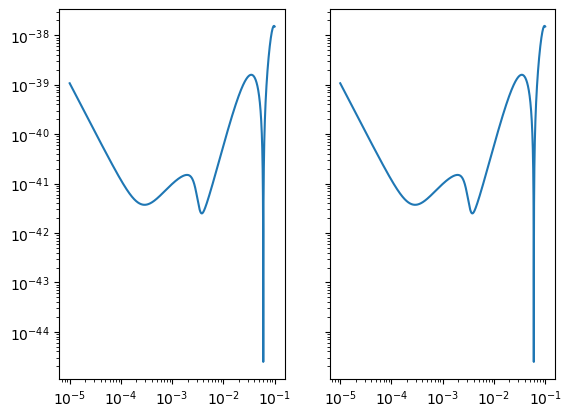

In [9]:
sens_mat.loglog()

比较有无前景混淆噪声情况下的灵敏度曲线，然后再比较两个有前景噪声但观测时间值不同的灵敏度曲线。

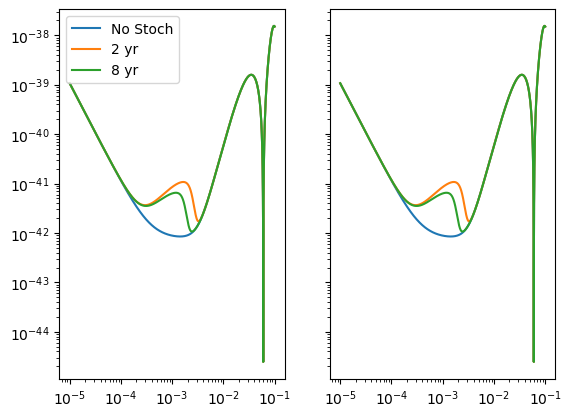

In [10]:
sens_mat_no_confusion = deepcopy(sens_mat)
sens_mat_no_confusion.update_stochastic(stochastic_params=None) #没有噪声

sens_mat_2_yr = deepcopy(sens_mat)
sens_mat_2_yr.update_stochastic(stochastic_params=(2 * YRSID_SI,))#2 yr噪声

sens_mat_8_yr = deepcopy(sens_mat)
sens_mat_8_yr.update_stochastic(stochastic_params=(8 * YRSID_SI,))#8 yr噪声

fig, ax = sens_mat_no_confusion.loglog(label="No Stoch")

sens_mat_2_yr.loglog(fig=fig, ax=ax, label="2 yr")
sens_mat_8_yr.loglog(fig=fig, ax=ax, label="8 yr")
ax[0].legend()

我们发现有噪声下的曲线在下降处比无噪声的曲线多一个突起，同时观测时间越长，这个突起越小，与无噪声的灵敏度曲线越接近。

### 问题

为什么前景噪音会随着时间变化？这对分析有什么深远影响？

### 回答
查阅档案得知，银河前景噪声的双曲正切模型是一个时间的函数。这告诉我们在做模型灵敏度分析的时候应该考虑到时间元素。

### 任务 2：建立一个 DataResArray ，用于存储和绘制数据信息。

建立一个用于计算的正弦信号，并将它存储在 [DataResArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray) 中。这个正弦信号应包含 4 个参数：$A$（振幅）、$f_0$（频率）、$\dot{f}_0$（频率导数）和  $\phi_0$（初始相位）：
 
$$ h_1(t) = A\sin{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$
$$ h_2(t) = A\cos{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$

选择参数，使用合理的时间步长($\sim10$s)和观测时间 ($\sim$yr)绘制 $h_1$ 和 $h_2$。

In [11]:
dt = 15
Tobs = YRSID_SI
Nobs = int(Tobs / dt)
t = np.arange(Nobs) * dt

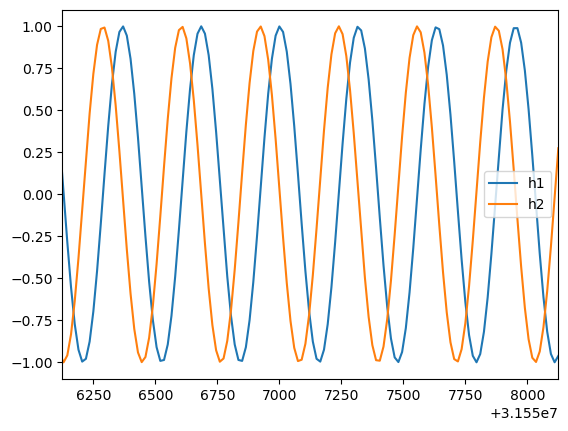

In [12]:
A = 1
f0 = 1e-9
dotf_0 = 1e-10
phi0 = 0

h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * dotf_0 * t ** 2) + phi0)
h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * dotf_0 * t ** 2) + phi0)
plt.plot(t, h1, label="h1" )
plt.plot(t, h2, label="h2" )
plt.xlim(t[-1] - 2000.0, t[-1])
plt.legend(loc = 0)
plt.show()

现在，把通道h1、h2添加到 `DataResArray`中。

In [13]:
# useful imports
from lisatools.datacontainer import DataResidualArray

In [14]:
data_res_arr = DataResidualArray([h1, h2], dt=dt)

/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


用数据残差阵列绘图函数绘制信号图。

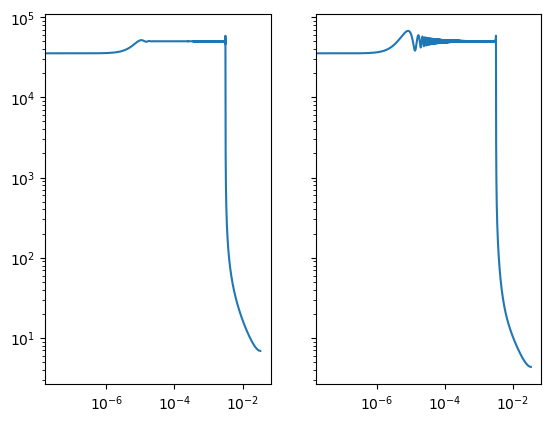

In [15]:
fig, ax = data_res_arr.loglog()

### 问题 3

输入时域信号后，`DataResidualArray` 类会对其进行底层转换。这时上方的输出发生了什么变化？

用 numpy（`np.fft.rfft`）对输入的时域数据集进行 FFT 操作并添加到上图中。

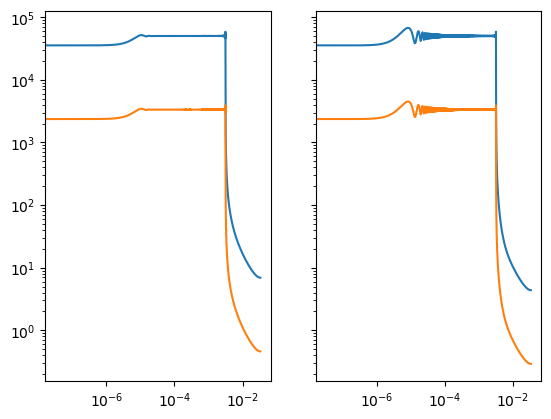

In [16]:
fig, ax = data_res_arr.loglog()
h1_f = np.abs(np.fft.rfft(h1))
h2_f = np.abs(np.fft.rfft(h2))
ax[0].loglog(data_res_arr.f_arr, h1_f)
ax[1].loglog(data_res_arr.f_arr, h2_f)
plt.show()

### 回答
我们发现输入时域数据后，输出的图像水平下移，变小了。

所做的 FFT 与存储在 `DataResidualArray` 中的频域频谱之间的差了什么因子？这个项从何而来？(这是一个容易被忽略的细节）

In [17]:
print(data_res_arr[0]/ h1_f)

[15.        +0.00000000e+00j 14.99939709-1.34487346e-01j
 14.99758835-2.68967718e-01j ... 15.        -4.16956568e-05j
 15.        -2.05837477e-05j 15.        +0.00000000e+00j]


### 回答
忽略`date_res_arr`中的虚数部分，它和处理后的数据差了一个因子：15。根据观察上面设置的参数，并且经过几次实验，我确定了这个因子差来自时间步长`dt`。

## 任务 3：组合`AnalysisContainer`对象。

现在将数据和灵敏度信息组合成一个 [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container) 对象，使数据和灵敏度矩阵在底层更有效地运行，有助于简化分析。

对数据和灵敏度信息进行新的设置。稍后使用该对象进行计算。

In [18]:
from lisatools.analysiscontainer import AnalysisContainer

In [19]:
analysis = AnalysisContainer(data_res_arr, sens_mat)

/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1e-24, 1e-19)

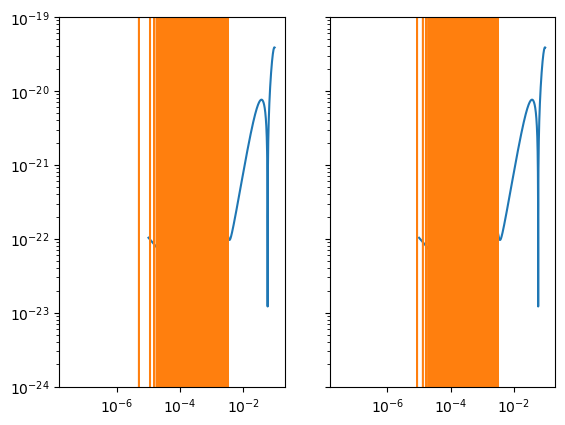

In [20]:
fig, ax = analysis.loglog()
ax[0].set_ylim(1e-24, 1e-19)

## 任务 4：计算内积。

向数据中引入一个信号，并计算另一个信号与该数据的内积。把 `data_res_arr` 作为数据输入。

生成一个新信号，它的参数选择需要与上面加入的信号有所不同。

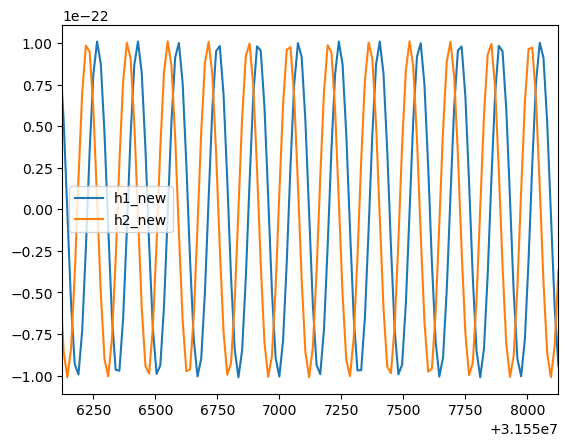

In [24]:
A_new = 1.01e-22
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (1.000001)
phi0_new = 3.1
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
plt.plot(t, h1_new, label="h1_new" )
plt.plot(t, h2_new, label="h2_new" )
plt.xlim(t[-1] - 2000.0, t[-1])
plt.legend(loc = 0)
plt.show()

新信号与引进的数据的内积是多少？使用 numpy 计算方程的内积：
$$ \langle h_1 | h_2 \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}_1(f)^*\tilde{h}_2(f)}{S_n(f)}df \ \ .$$


In [25]:
template = DataResidualArray([h1_new, h2_new], dt=dt)
sens_mat.update_frequency_arr(template.f_arr)
hold_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * data_res_arr[:, 1:] / sens_mat[:, 1:]))
print(hold_hnew)

/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/txr/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3

-7.304573136224119e+21


使用 `AnalysisContainer` 类中的 [inner_product](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.inner_product)计算内积。

In [26]:
analysis.template_inner_product(template)

-7.304573136036365e+21

结果可能不完全一致。`lisatools` 中的底层内积函数用到 `np.rapz`。求和时可能会出现小到可以忽略不计的差异。

试着使用上面选择的参数。尝试了解内积如何随所选参数的变化而变化（即这些参数与引进的参数相差多远）。

In [33]:
A_new = 1.01
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (1.000001)
phi0_new = 3.1
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
analysis.template_inner_product(template)

-7.304573136036548e+43

In [34]:
A_new = 1.01
f0_new = 3.0000003
dot_fnew = 1e-10 * (1.000001)
phi0_new = 3.1
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
analysis.template_inner_product(template)

6.689218264933007e+46

In [35]:
A_new = 1.01
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (3.000001)
phi0_new = 3.1
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
analysis.template_inner_product(template)

-4.549694650492498e+43

In [38]:
A_new = 1.01
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (1.000001)
phi0_new = 6
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
analysis.template_inner_product(template)

6.521496099902806e+43

### 结论
经过实验，方差与A变化相同的倍数；

f0，频率导数初相位对方差有更显著的影响。

## 任务 5：计算信噪比。

有两种信噪比（SNR）是LISA分析中关注的。
* 模板最佳信噪比($\rho_\text{opt}$)，指一个模板在给定噪声情况下可能达到的最大信噪比($h$是模板)：
$$ \rho_\text{opt} = \sqrt{\langle h | h \rangle}\ \ .  $$
如果引入数据与模板完全等效，就能达到这个信噪比。

* 检测信噪比($\rho_\text{det}$). 其计算公式为
$$ \rho_\text{det} = \frac{\langle d | h \rangle}{\sqrt{\langle h | h \rangle}} = \frac{\langle d | h \rangle}{\rho_\text{opt}}\ \ .  $$
 
上面计算了 $\langle d | h \rangle$，现在使用numpy数组计算 $\langle h | h \rangle$，并计算出最佳信噪比和检测信噪比。

In [40]:
hnew_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * template[:, 1:] / sens_mat[:, 1:]))
print(hnew_hnew)
print(f"Opt SNR: {np.sqrt(hnew_hnew)}, Det SNR: {hold_hnew / np.sqrt(hnew_hnew)}")

1.6134920284190117e+49
Opt SNR: 4.016829630963967e+24, Det SNR: -0.001818492146123497


还可以使用 `AnalysisContainer` 中的[template_snr](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr)计算该值。

In [41]:
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 4.016829630963965e+24, Det SNR: 1.6235431170970081e+19


### 问题

模板参数的改变对最佳信噪比和检测信噪比有何影响？

In [44]:
A_new = 2.02
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (1.000001)
phi0_new = 6
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 8.03365926192793e+24, Det SNR: 1.6235431170970081e+19


In [45]:
A_new = 1.01
f0_new = 3.0000003e-2
dot_fnew = 1e-10 * (1.000001)
phi0_new = 6
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 2.0629100424261283e+23, Det SNR: 6.404409164311599e+18


In [46]:
A_new = 1.01
f0_new = 3.0000003e-3
dot_fnew = 1e-8 * (1.000001)
phi0_new = 6
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 1.5620764803980253e+24, Det SNR: 2.2153914645346318e+21


In [47]:
A_new = 1.01
f0_new = 3.0000003e-3
dot_fnew = 1e-10 * (1.000001)
phi0_new = 3
h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * dot_fnew * t ** 2) + phi0_new)
template = DataResidualArray([h1_new, h2_new], dt=dt)
opt_snr, det_snr = analysis.template_snr(template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 4.0168296309639657e+24, Det SNR: -1.7500967887284089e+19


### 结论
振幅改变使Opt SNR改变相同的倍数，对Det SNR没有影响；

频率和频率导数对两者均有影响；

初始相位改变对Opt SNR没有影响，对Det SNR有影响。

## 任务 6：计算似然。

LISA（和其他全球定位系统）中使用的似然是一种高斯似然，它将典型的 $\frac{x - \mu}{\sigma}$ 项替换为残差数据与自身的噪声加权内积： 
 $\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle$
 
1) 残差的含义：数据和模板之间的差值。
  
   $$ \vec{r} = \vec{d} - \vec{h} $$

   计算数据和模板的残差，并将其存储到一个新的 `DataResidualArray` 中。

In [49]:
r1 = h1_new - h1
r2 = h2_new - h2
residual = DataResidualArray([r1, r2], dt=dt)

2) 计算残差与自身的内积。
  
   提示：可以将其放入一个新的 `AnalysisContainer` 中，然后直接计算。

In [50]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

2.340190143093711e+49


3) 建立完整的似然。高斯似然的计算公式为
   
   $$ \mathcal{L} = e^{-\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle} \ \ . $$

   计算时通常使用似然的自然对数：

   $$ \ln{\mathcal{L}} = -\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle \ \ . $$

   运用这个方法，取上面的内积值，计算模板的似然。

In [51]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

2.340190143093711e+49


因为内积是一种线性运算，所以可以将内积分解成几个部分：
$$ \ln{\mathcal{L}} = -\frac{1}{2}\left(\langle \vec{d} | \vec{d}\rangle + \langle \vec{h} | \vec{h}\rangle - 2 \langle \vec{d} | \vec{h}\rangle\right) \ \ . $$

常见术语：
* $\langle \vec{h} | \vec{h}\rangle = \rho_\text{opt}^2$
* $\langle \vec{d} | \vec{h}\rangle \sim \rho_\text{det} * \rho_\text{opt}$ （相位最大化时）
* $\langle \vec{d} | \vec{d}\rangle$ 是数据与自身的内积。一般来说，在 MCMC 分析中 $\langle \vec{d} | \vec{d}\rangle$ 项将在整个采样过程中保持不变。

可以使用用 `AnalysisContainer` 类中的 [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_likelihood)计算模板的似然。

In [52]:
analysis.template_likelihood(template)

-1.1700950715468544e+49

### 问题:

改变参数对似然有何影响？这与最佳信噪比和检测信噪比的数值大小有什么联系？在 [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) 中有两个有趣的关键字参数：`include_psd_info` 和 `phase_maximize`。在似然和信噪比计算中都可以找到 `phase_maximize` 参数。阅读文档并加入这些关键字参数，能找出它们在这些计算中的作用吗？

## 任务 7：添加信号模型。

在 Likelihood 类中添加一个信号模型。这个信号模型可以在实例化 `AnalysisContainer` 时设置为关键字参数，或者在之后设置为属性。

首先需要把正弦信号转化为一个函数（创建方法和教程0中创建类的方法类似）。创建一个能够接收四个参数的函数($A$, $f_0$, $\dot{f}_0$, $\phi_0$)，并返回`[h1, h2]`（正弦和余弦函数）列表。将时间数组作为参数添加到生成器中。它的函数签名应该是：`sinusoidal_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)`

In [ ]:
def sinusoidal_waveform(A: float, f0: float, fdot: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]:
    h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    return [h1, h2]

更新 `signal_gen` 属性，将信号模型添加到 Likelihood 类中。

In [ ]:
analysis.signal_gen = sinusoidal_waveform

用一组新参数计算 Likelihood。其中`t`应作为输入的最后一个参数。

## 附加题

复习教程的各个部分，调整信号或灵敏度模型。观察内积、信噪比和信度是如何变化的。理解这些基本部分对 LISA 数据分析非常重要。

（这一部分已经在上面完成）

## 学习总结：
本教程中我学习到了利用lisatools计算并绘制灵敏度函数的方法，以及通过观察灵敏度曲线，得到关于模型的有效灵敏信息。以及一些对银河系底噪的讨论。学习用DataResidualArray类存储数据，绘制矩阵残差图像，并发现了用傅里叶变换操作加入时域信号后，输出的信号比原来少了一个dt的因子。接下来学习了计算两个正弦波信号的内积，内积的大小与信号的振幅，频率，频率导数和初相位存在一定的关系，我通过改变代码中的参数进行了几次实验来验证这一点。第五，学习了信噪比的计算方法，通过改变模板中参数，研究参数和信噪比直接的关系，最后是似然的计算方法。研究似然和参数、最佳信噪比、检测信噪比之间的关系，让我对于信号波分析的基本内容有了更深的了解。

这个章节中，学习了一些引力波数据分析的基本信息的计算，灵敏度曲线，信噪比，内积，似然。这些概念我在波分析以外的其他领域接触比较少。灵敏度我在建模学习中接触过，代表了一个模型的结果变化对系统参数或周围条件变化的敏感程度。

灵敏度曲线的差异代表了一个参数改变多少会对产生的结果造成多大的影响。灵敏度曲线一般越接近左上角越好。

灵敏度曲线反应了一个假性的概率。


analysiscontainer的使用，在底层上加快了速度。该对象体现了模块化的分析过程。

内积计算方法。

numpy和lisatool的内积计算函数结果存在一定的差异。

内积随所选参数变化的规律。

似然：跟概率相反，用于在已知某些观测所得到的结果时，对有关事物的性质的参数进行估值
为了处理噪音引入的信息，可以通过内积计算似然，也可以直接用类中的函数计算。